## Analysis of Misophonia Dataset
### Compare the influence of mental health factors and sex on misophonia and vice-versa

## Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
The dataset has `.csv` extension, but it is actually semicolon `;` separated, so we used `;` separator in `read_csv()` method.

In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/main/datasets/misophoinia_data.csv", sep=";")
display(data)

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


## Description of mental health factors we try to analyze
- `ansiedad.rasgo`: Score from 0-100 with anxiety personality trait
- `ansiedad.rasgo.dic`: Binary score (0,1) of anxiety personality trait
- `ansiedad.estado`: Score from 0-100 with current state of anxiety
- `ansiedad.estado.dic`: Binary score (0,1) with current state of anxiety
- `ansiedad.medicada`: Diagnosed with anxiety disorder (si, no)
- `ansiedad.medicada.dic`: Diagnosed with anxiety disorder (1, 0)
- `depresion`: Score from 0-50 with current state of depression
- `depresion.dic` : Binary score (0,1) with current state of depression

The raw data contains some non-numeric values (`NaN` i.e. Not a Number) which are irrelevant for our analysis, so we filter such values with `dropna()` method of the `DataFrame` class.

In [93]:
misofonia = data["Misofonia"].dropna()
misofonia_dic = data["Misofonia.dic"].dropna()
ansiedad_rasgo = data["ansiedad.rasgo"].dropna()
ansiedad_estado = data["ansiedad.estado"].dropna()
ansiedad_medicada = data["ansiedad.medicada"].dropna()
depression = data["depresion"].dropna()

## Distribution Plots

First we try to visualize the distribution of the plots as histograms, for categorical dataset, and kernel density estimation (KDE) plots for continuous dataset. The curve seen on the KDE plots represents the continuous probability density. With such limited dataset, its hard to generalize the overall distribution of the factors. However, as seen from the plots, the data distrubition seems non-gaussian.

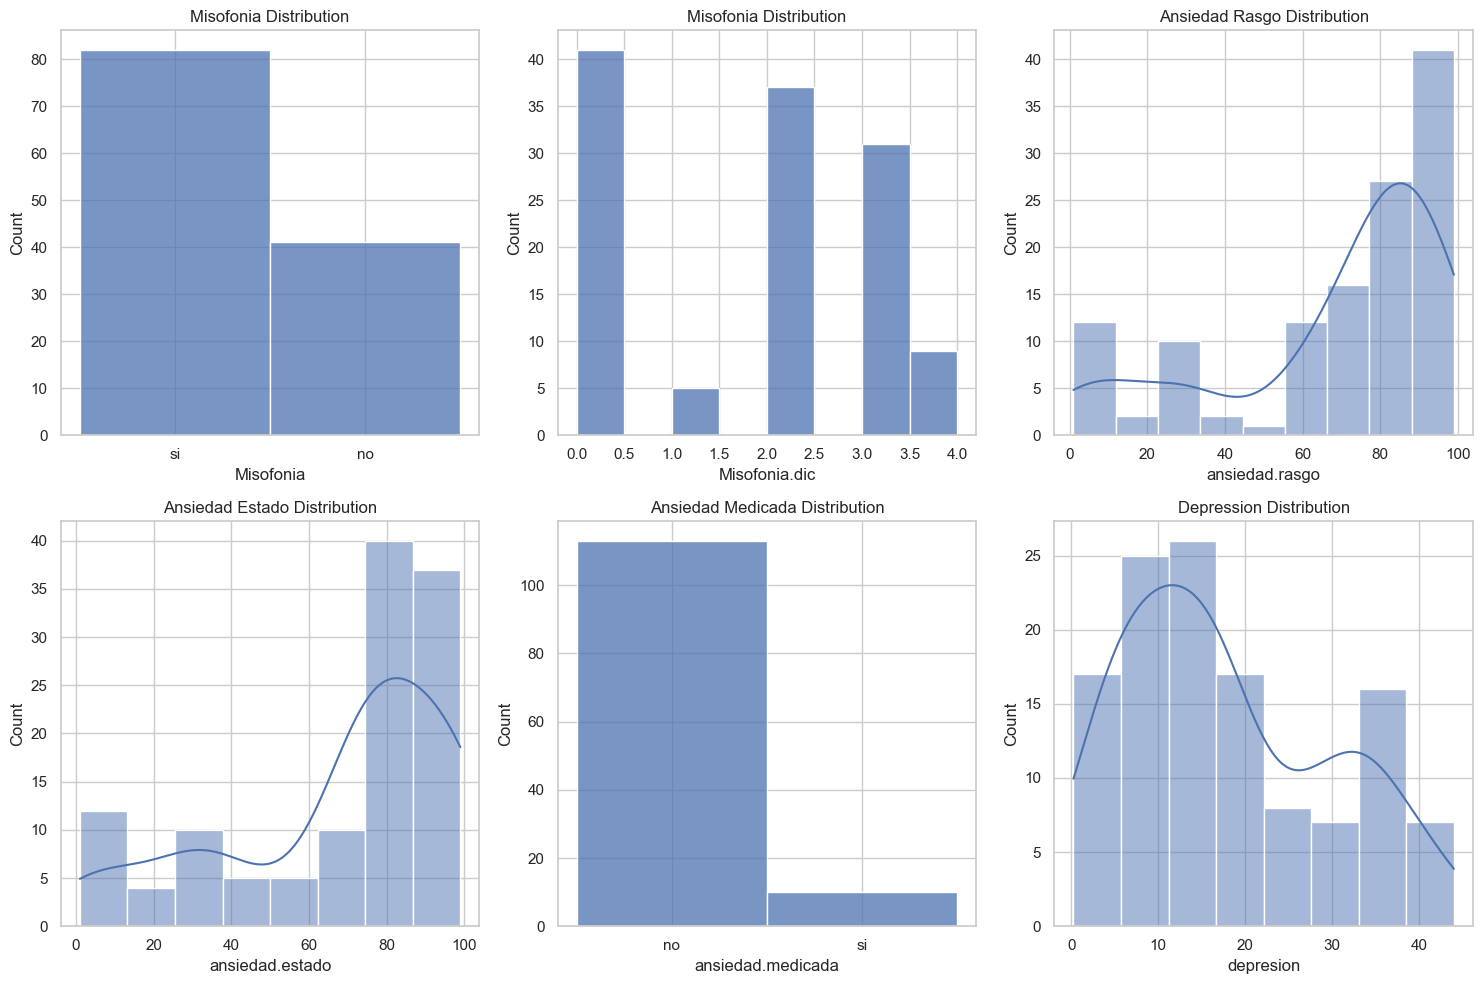

In [92]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sns.histplot(data["Misofonia"], kde=False, ax=ax[0, 0])
ax[0, 0].set_title('Misofonia Distribution')

sns.histplot(data["Misofonia.dic"], kde=False, ax=ax[0, 1])
ax[0, 1].set_title('Misofonia Distribution')

sns.histplot(data["ansiedad.rasgo"], kde=True, ax=ax[0, 2])
ax[0, 2].set_title('Ansiedad Rasgo Distribution')

sns.histplot(data["ansiedad.estado"], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Ansiedad Estado Distribution')

sns.histplot(data["ansiedad.medicada"], kde=False, ax=ax[1, 1])
ax[1, 1].set_title('Ansiedad Medicada Distribution')

sns.histplot(data["depresion"], kde=True, ax=ax[1, 2])
ax[1, 2].set_title('Depression Distribution')

plt.tight_layout()
plt.show()

We also use the violin and box plots to see the differences in means of the mental health factors for Misophonia and No Misophonia cases. Here we don't plot the `ansiedad.medicada` as it is binary data.

In [53]:
def distribution_plot(data, independent_var="Misofonia.dic", columns_to_plot = ['ansiedad.rasgo', 'ansiedad.estado', 'depresion'], type="box"):
    data_melted = data.melt(id_vars=independent_var, value_vars=columns_to_plot, var_name='Variable', value_name='Value')
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 8))
    if type=="violin":
        sns.violinplot(x=independent_var, y='Value', hue='Variable', data=data_melted, palette='muted')

    elif type=="box":
        sns.boxplot(x=independent_var, y='Value', hue='Variable', data=data_melted, palette='muted')
    
    else: 
        raise Exception("type can be either violin or box")

    plt.title(f'{type.capitalize()} Plots of Mental Health Factors by Misofonia')
    plt.xlabel('Misofonia Groups')
    plt.ylabel('Values')
    # plt.savefig("violinplot.png")

    plt.tight_layout()
    plt.show()

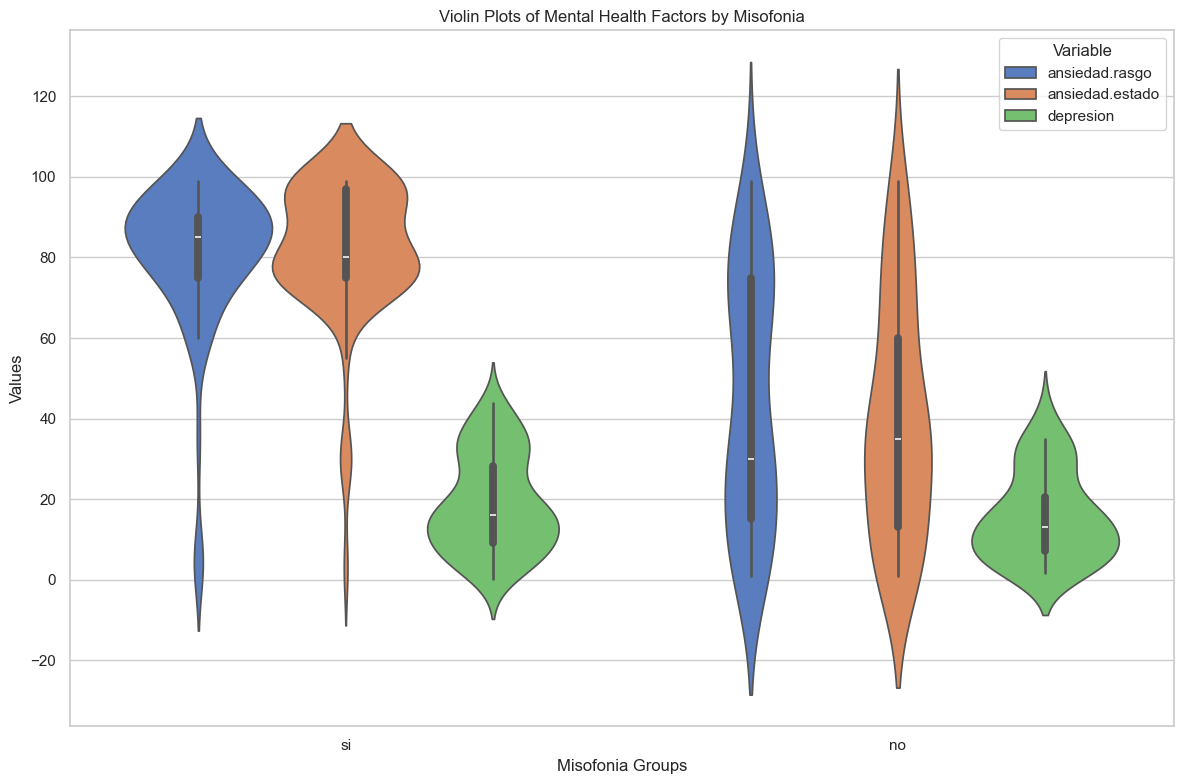

In [54]:
distribution_plot(data, independent_var="Misofonia", type="violin")

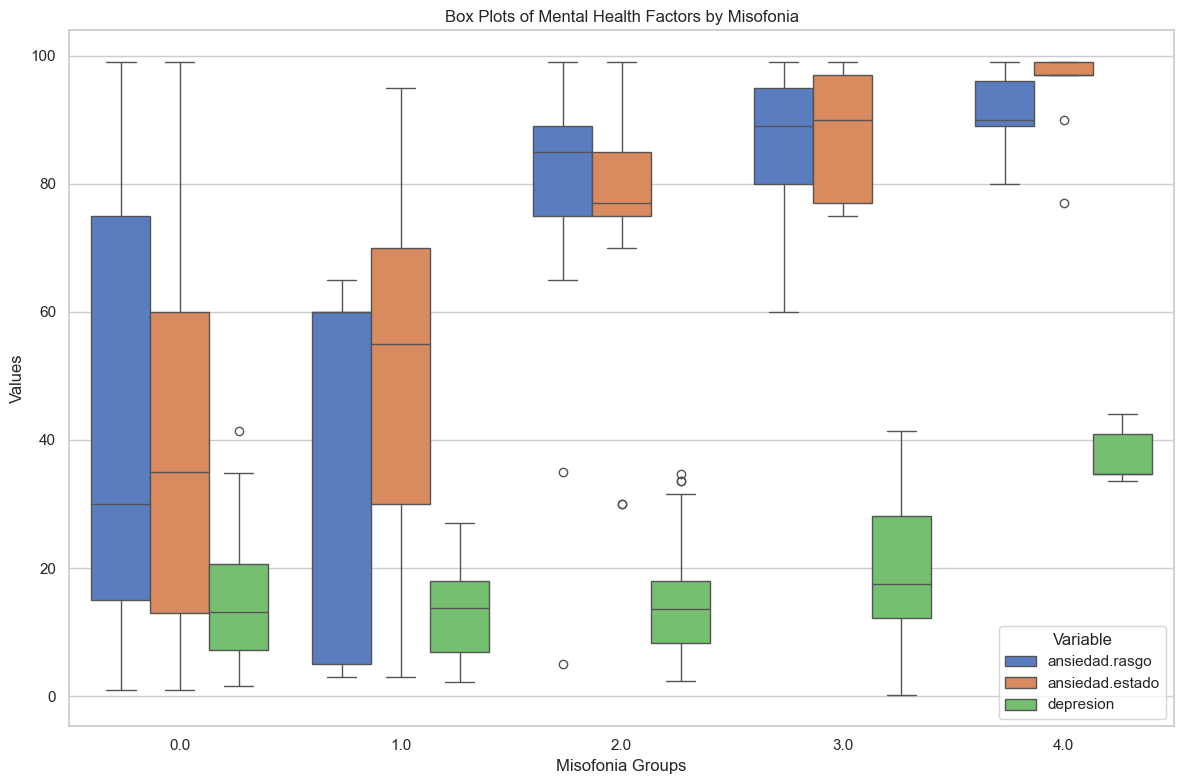

In [55]:
distribution_plot(data, type="box")

## Questions and Hypothesis

After analyzing the distributions, we decide to study the relation between misophinia and the mental health factors in both ways. The questions we try to answer are as follows:

*   Does the misophonia influence the mental health factors?
*   Which mental health factors significantly influence misophonia?
*   Is there any significant interaction between these factors in relation to misophonia?

Analyzing the violin and box plots, we hypothesize that misophonia has an effect on anxiety factors but not on depression. With this assumption we analyze the statistical relationship with different methods.

## ANOVA analysis for the effect of mental health factors on Misophonia

Although the plots show non-gaussian distributions, we wanted to test the central-limit theorem which implies "For any random variable X with any type of probability function f(x), given that the n is large, we can assume the mean distribution as Gaussian". So with the assumption that the mean distributions of the mental health factors are Gaussian in nature, we proceed with the ANOVA analysis. Later we also cross-validate this assumption with other analysis dedicated to non-gaussian data.

In [39]:
from statsmodels.formula.api import ols, logit
from statsmodels.stats.anova import anova_lm

### Preprocessing the data
To avoid ambiguity for `.dic` in column names of the data (eg. `ansiedad.medicada.dic`) as a method of a class, we replace the `.` with `_` with `replace()` method of `str` class. We also drop all the `NaN` (Not a Number) values from the columns we are interested in and map the `Misofonia` column values to `0` and `1` for `no` and `si`.

In [130]:
def preprocess_data(data):
    data.columns = data.columns.str.replace('.', '_', regex=False)
    missing_values = data[['Misofonia', 'ansiedad_rasgo', 'ansiedad_estado', 'depresion', 'ansiedad_medicada']].isnull().sum()
    data_cleaned = data.dropna(subset=['Misofonia', 'ansiedad_rasgo', 'ansiedad_estado', 'depresion', 'ansiedad_medicada'])
    data_cleaned.loc[:, 'Misofonia'] = data_cleaned['Misofonia'].map({'si': 1.0, 'no': 0.0})

    # print(data_cleaned['Misofonia'].unique(), data_cleaned['ansiedad_rasgo'].unique(), data_cleaned['ansiedad_estado'].unique(), data_cleaned['depresion'].unique(), data_cleaned['ansiedad_medicada'].unique())

    return data_cleaned

In [131]:
data_cleaned = preprocess_data(data)

### ANOVA Models for each factors on Misophonia
Here the groups to be analyzed are `Misofonia si` and `Misofonia no`. We need to analyze the mean differences for these two groups for all the mental health factors. This way we can find the realtion between the each mental health factors and the Misophonia. However, we need to make a different interpretation for the interaction between different meantal health factors.

Hypothesis: For each mental health factors,

$H_0$: $\mu_{misofonia} = \mu_{no-misofonia}$

$H_0$: $\mu_{misofonia} \neq \mu_{no-misofonia}$

To avoid the repetitions of the code, we make a function `ANOVA_analysis` that will take the independent and dependent variables as arguments and compute their between the `independent_var` and each `dependent_vars` in a loop.

In [42]:
def ANOVA_analysis(independent_var, dependent_vars):
    for var in dependent_vars:
        anova_model = ols(f'{var} ~ {independent_var}', data=data_cleaned).fit()
        anova_results = anova_lm(anova_model)
        print(f"ANOVA Results for {var}: \n{anova_results}")
        print("=" * 80) #print `=` 80 times, just for the sake of easier output distinction between variables


In [45]:
ANOVA_analysis(independent_var="Misofonia", dependent_vars=["ansiedad_rasgo", "ansiedad_estado", "depresion", "ansiedad_medicada_dic"])

ANOVA Results for ansiedad_rasgo: 
              df        sum_sq       mean_sq          F        PR(>F)
Misofonia    1.0  35616.260163  35616.260163  64.033878  8.383930e-13
Residual   121.0  67301.365854    556.209635        NaN           NaN
ANOVA Results for ansiedad_estado: 
              df        sum_sq       mean_sq           F        PR(>F)
Misofonia    1.0  49059.658537  49059.658537  101.822444  9.607413e-18
Residual   121.0  58299.707317    481.815763         NaN           NaN
ANOVA Results for depresion: 
              df        sum_sq     mean_sq         F    PR(>F)
Misofonia    1.0    314.818391  314.818391  2.309286  0.131212
Residual   121.0  16495.584713  136.327146       NaN       NaN
ANOVA Results for ansiedad_medicada_dic: 
              df    sum_sq   mean_sq         F    PR(>F)
Misofonia    1.0  0.199187  0.199187  2.681592  0.104112
Residual   121.0  8.987805  0.074279       NaN       NaN


### ANOVA Results Analysis
p-value < 0.05 implies statistically significant difference in the scores of mental health factors on individuals with and without misophonia. On contrast, p-value > 0.05 means no statistically significant difference.

1. `ansiedad.rasgo`:

    **p-value (PR(>F)):** $8.38×10^{−13}$

    Misophonia has statistically significant effect on the anxiety personality traits.

2. `ansiedad.estado`:

    **p-value (PR(>F)):** $9.6×10^{−18}$
    
    Misophonia has statistically significant effect on the current state of anxiety.

3. `depresion`:

    **p-value (PR(>F)):** 0.13

    Misophonia has no statistically significant effect on the depression. This implies that misophonia may not be strongly associated with levels of depression in this dataset.

3. `ansiedad.medicada.dic`:

    **p-value (PR(>F)):** 0.10

    Misophonia has no statistically significant effect on the diagnosis of misophonia. This has a physical sense, as the treatment (or not) of the anxiety has no relation with the misophonia disease.

### ANOVA Models for each factors on Misophonia Levels
Here the groups to be analyzed are `Misofonia Levels` (`0`, `1`, `2`, `3`, and `4`). We analyze the mean differences for these groups for all the mental health factors.

Hypothesis: For each mental health factors,

$H_0$: $\mu_{0} = \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$

$H_0$: Any one of them is different

In [46]:
ANOVA_analysis(independent_var="Misofonia_dic", dependent_vars=["ansiedad_rasgo", "ansiedad_estado", "depresion", "ansiedad_medicada_dic"])

ANOVA Results for ansiedad_rasgo: 
                  df        sum_sq       mean_sq          F        PR(>F)
Misofonia_dic    1.0  42392.927060  42392.927060  84.751255  1.254982e-15
Residual       121.0  60524.698956    500.204124        NaN           NaN
ANOVA Results for ansiedad_estado: 
                  df        sum_sq       mean_sq          F        PR(>F)
Misofonia_dic    1.0  55075.683139  55075.683139  127.46152  1.249213e-20
Residual       121.0  52283.682715    432.096551        NaN           NaN
ANOVA Results for depresion: 
                  df        sum_sq      mean_sq          F    PR(>F)
Misofonia_dic    1.0   1669.557526  1669.557526  13.342482  0.000385
Residual       121.0  15140.845578   125.130955        NaN       NaN
ANOVA Results for ansiedad_medicada_dic: 
                  df    sum_sq   mean_sq         F    PR(>F)
Misofonia_dic    1.0  0.291799  0.291799  3.969299  0.048588
Residual       121.0  8.895193  0.073514       NaN       NaN


### ANOVA Results Analysis

1. `ansiedad.rasgo`:

    **p-value (PR(>F)):** $1.25×10^{−15}$

    Misophonia levels has statistically significant effect on the anxiety personality traits.

2. `ansiedad.estado`:

    **p-value (PR(>F)):** $1.24×10^{−20}$
    
    Misophonia levels has statistically significant effect on the current state of anxiety.

3. `depresion`:

    **p-value (PR(>F)):** 0.0003

    Misophonia levels has statistically significant effect on the depression. This analysis is different from the one obeserved for `Misofonia si` and `no` groups. Therefore, we assume that one of the 4 levels of severity affects the depression level significantly, most probably the higher severity groups.

3. `ansiedad.medicada.dic`:

    **p-value (PR(>F)):** 0.048

    Misophonia has no statistically significant effect on the diagnosis of misophonia.

## Correlation between mental health factors
Since the ANOVA results suggest significant effect of misophonia above more than one mental health factor, we suspect there might be correlation between these factors. Thus we visualize their correlations as well using confusion matrix.

In [47]:
def confusion_matrix(data, columns=['ansiedad_rasgo', 'ansiedad_estado', 'ansiedad_medicada_dic', 'depresion']):
    selected_data = data[columns]
    corr_matrix = selected_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='winter', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Matrix for Mental Health Factors')
    plt.show()

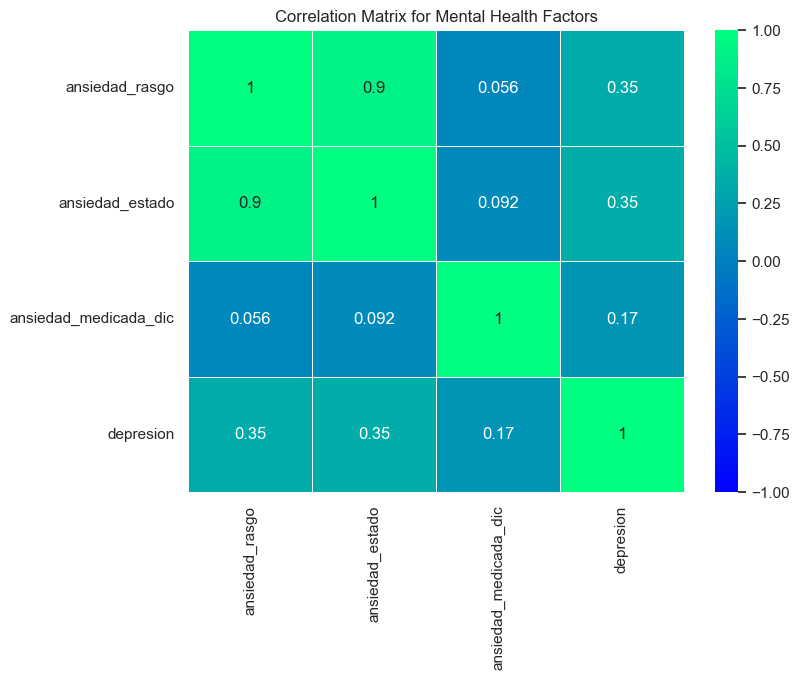

In [48]:
confusion_matrix(data=data_cleaned)

We see a significant correlation of coefficient `0.9` between `ansiedad.rasgo` and `ansiedad.estado` while other variables have small correlations (< 0.5).

## Test for Normality

Our main reason for using ANOVA was the central limit theorem, although the distribution of the data was non-Gaussian. Now, we challenge our previous assumption and check the normality and perform non-Gaussian hypothesis tests. To check the normality, we use **Shapiro-Wilk** test.

In [56]:
from scipy.stats import shapiro

def check_normality(data, columns=["ansiedad_rasgo", "ansiedad_estado", "depresion", "ansiedad_medicada_dic"]):
  for col in columns:
    data_for_test = data_cleaned[col].dropna()
    statistic, p_value = shapiro(data_for_test)
    print(f"Shapiro-Wilk Test for {col}: \nStatistic: {statistic}, p-value: {p_value}")

    if p_value > 0.05:
      print(f"{col} is Normally distributed.")
    else:
      print(f"{col} is not Normally distributed.")
    print("=" * 60)


In [57]:
check_normality(data_cleaned)

Shapiro-Wilk Test for ansiedad_rasgo: 
Statistic: 0.812702530327418, p-value: 3.2033579654280015e-11
ansiedad_rasgo is not Normally distributed.
Shapiro-Wilk Test for ansiedad_estado: 
Statistic: 0.8535167063436664, p-value: 1.098454610991763e-09
ansiedad_estado is not Normally distributed.
Shapiro-Wilk Test for depresion: 
Statistic: 0.933527389024646, p-value: 1.2768723504890402e-05
depresion is not Normally distributed.
Shapiro-Wilk Test for ansiedad_medicada_dic: 
Statistic: 0.30339483862103267, p-value: 1.2635616361664177e-21
ansiedad_medicada_dic is not Normally distributed.


As seen from the distribution plots of the mental health factors, we obsever non-normality in their distribution. This is just the quanitative validation of the non-Gaussianity. Now, we need to perform a non-Gaussian hypothesis testing to cross-validate the results from the ANOVA analysis. For this, we use **Kruskal–Wallis test**.

In [58]:
from scipy.stats import kruskal

def kruskal_test(data, independent_var="Misofonia", columns=["ansiedad_rasgo", "ansiedad_estado", "depresion", "ansiedad_medicada_dic"]):
  unique_vals = data[independent_var].unique()
  for col in columns:
    groups = []
    for val in unique_vals:
      group = data[data[independent_var] == val][col].dropna()
      groups.append(group)

    statistic, p_value = kruskal(*groups)

    print(f"Kruskal-Wallis Test for {col}:")
    print(f"  Statistic: {statistic}")
    print(f"  P-value: {p_value}")
    if p_value > 0.05:
      print(f"  There is no significant difference between groups for {col}.")
    else:
      print(f"  There is a significant difference between groups for {col}.")
    print("=" * 60)

In [59]:
kruskal_test(data=data_cleaned)

Kruskal-Wallis Test for ansiedad_rasgo:
  Statistic: 36.983447301135314
  P-value: 1.1913635708815705e-09
  There is a significant difference between groups for ansiedad_rasgo.
Kruskal-Wallis Test for ansiedad_estado:
  Statistic: 46.056458512496036
  P-value: 1.1489376076384671e-11
  There is a significant difference between groups for ansiedad_estado.
Kruskal-Wallis Test for depresion:
  Statistic: 2.193192002520381
  P-value: 0.13862177825322408
  There is no significant difference between groups for depresion.
Kruskal-Wallis Test for ansiedad_medicada_dic:
  Statistic: 2.6451327433627085
  P-value: 0.10386748073972732
  There is no significant difference between groups for ansiedad_medicada_dic.


In [60]:
kruskal_test(data=data_cleaned, independent_var="Misofonia_dic")

Kruskal-Wallis Test for ansiedad_rasgo:
  Statistic: 55.4008775135662
  P-value: 2.6775700259832465e-11
  There is a significant difference between groups for ansiedad_rasgo.
Kruskal-Wallis Test for ansiedad_estado:
  Statistic: 62.45027378333112
  P-value: 8.857070920423172e-13
  There is a significant difference between groups for ansiedad_estado.
Kruskal-Wallis Test for depresion:
  Statistic: 22.986405465472583
  P-value: 0.00012742048719946696
  There is a significant difference between groups for depresion.
Kruskal-Wallis Test for ansiedad_medicada_dic:
  Statistic: 6.375075983777251
  P-value: 0.17283376850952928
  There is no significant difference between groups for ansiedad_medicada_dic.


These results and analyses from the Kruskal-Wallis test aligns with that from the ANOVA. Thus, our cross-validation shows that given that the dataset is sufficiently large, we can assume the normality in the distribution of means and perform analysis based on normality such as ANOVA.

## Check if mental health variables affect Misophonia (the other way around)
To check the relation between the studied variables and Misophonia but the other way round (considering the mental health factors as the independent variables and the misophonia as the dependent variable), we try to define a logistic regression model. Logistic regression explains how well the predictors (anxiety traits, current anxiety, depression, and whether the person has been diagnosed with anxiety) explain the probability of having misophonia while controlling for the effects of other variables. We also analyze the interaction terms between the independent variables. Moreover, as suggested by professor during our presentation, we add the different variables and interactions progressively to wee which is the best model to explain the relation.


In [61]:
logit_model = logit('Misofonia ~ ansiedad_rasgo', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.457638
         Iterations 6
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.2810
Time:                        12:30:51   Log-Likelihood:                -56.290
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 3.278e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6942      0.698     -3.858      0.000      -4.063

In [62]:
logit_model = logit('Misofonia ~ ansiedad_rasgo + ansiedad_estado', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.382099
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.3997
Time:                        12:30:51   Log-Likelihood:                -46.998
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 2.568e-14
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.4355      0.804     -4.272      0.000      -5.

In [68]:
logit_model = logit('Misofonia ~ ansiedad_rasgo + ansiedad_estado + ansiedad_rasgo * ansiedad_estado', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.375060
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4108
Time:                        12:33:34   Log-Likelihood:                -46.132
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 7.019e-14
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.1

In [69]:
logit_model = logit('Misofonia ~ ansiedad_rasgo * ansiedad_estado + depresion', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.367404
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4228
Time:                        12:34:23   Log-Likelihood:                -45.191
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 1.437e-13
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.8

In [70]:
logit_model = logit('Misofonia ~ ansiedad_rasgo * ansiedad_estado * depresion', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.364485
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4274
Time:                        12:34:42   Log-Likelihood:                -44.832
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 6.182e-12
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept         

In [72]:
logit_model = logit('Misofonia ~ ansiedad_rasgo + ansiedad_estado + depresion + ansiedad_medicada_dic', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.363543
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4289
Time:                        12:35:16   Log-Likelihood:                -44.716
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 9.060e-14
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.3557      0.872     -3.846  

In [73]:
logit_ = logit('Misofonia ~ ansiedad_rasgo * ansiedad_estado * depresion + ansiedad_medicada_dic', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_.summary()}")

Optimization terminated successfully.
         Current function value: 0.353313
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4449
Time:                        12:36:00   Log-Likelihood:                -43.458
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 5.724e-12
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept         

In [71]:
logit_model = logit('Misofonia ~ ansiedad_rasgo + ansiedad_estado + ansiedad_rasgo * ansiedad_estado + depresion + ansiedad_rasgo*ansiedad_estado*depresion', data=data_cleaned).fit()
print(f"Logistic Regression Results: \n{logit_model.summary()}")

Optimization terminated successfully.
         Current function value: 0.364485
         Iterations 7
Logistic Regression Results: 
                           Logit Regression Results                           
Dep. Variable:              Misofonia   No. Observations:                  123
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4274
Time:                        12:35:09   Log-Likelihood:                -44.832
converged:                       True   LL-Null:                       -78.291
Covariance Type:            nonrobust   LLR p-value:                 6.182e-12
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept         

### Analysis of Logistic Regression Results:
We know that the more complex the model, the higher will be its pseudo R-squared value ($R^2$), explaining a bigger part of the total variability. Pseudo R-squared value is a measure of how well the model explains the variation in the data (higher value indicates a better fit). However, we should also take into account the other statistical variables such as log-likelihood (higher log-likelihood (closer to 0) suggests a better model fit). We should also consider that having a higher $R^2$ value doesn't always mean the best-fit model, sometimes the complex models (with many interaction terms) might overfit the data or can be harder to interpret.

Analyzing the results of all different models we analyzed above, we see,

Model A: `Misofonia ~ ansiedad_rasgo * ansiedad_estado * depresion + ansiedad_medicada_dic` has highest $R^2$ value: 0.4449, with Log-Likelihood: -43.458.

Model B: `Misofonia ~ ansiedad_rasgo + ansiedad_estado + depresion + ansiedad_medicada_dic` has $R^2$ value: 0.4289, with Log-Likelihood: -44.716

Although the model A has the highest $R^2$ value and introduces higher-order interactions, it doesn't improve the model fit much, and most terms are not significant. As per our statistical interpretation, we consider the model B as the best choice as it has a decent $R^2$ and includes the key predictors without unnecessary complexity. 

**Result Analysis of Model B**:

- `ansiedad.rasgo.dic`: -0.0133 (p = 0.538)
    This coefficient is not statistically significant (p > 0.05), indicating that ansiedad_rasgo (trait anxiety) does not have a statistically significant effect on misophonia when controlling for the other variables.

- `ansiedad.estado.dic`: 0.0855 (p = 0.001)
    Current anxiety state is a statistically significant predictor (p < 0.05). It is positively associated with misophonia, as each unit increase in `ansiedad_estado` increases the log probability of having misophonia by 0.0855 i.e. $e^{0.0855}$ = 1.089, by 8.9%. 

- `depresion.dic`: -0.0408 (p = 0.107)
    Depression doesn't have statistically significant (p > 0.05) effect on misophonia in this model.
    
- `ansiedad.medicada.dic`: 2.0780 (p = 0.134)
    Medication for anxiety doesn't have statistically significant (p > 0.05) effect on misophonia in this model.

To further strengthen the **model B** in the above analysis was the best choice, we visualize the interaction between the mental health factors as regression model fits separately for `Misofonia` groups `si` and `no`. And we see no significant relation between the mental health factors. This further supports the the **model B** in a sense that the interaction terms are not so significant for regression analysis.

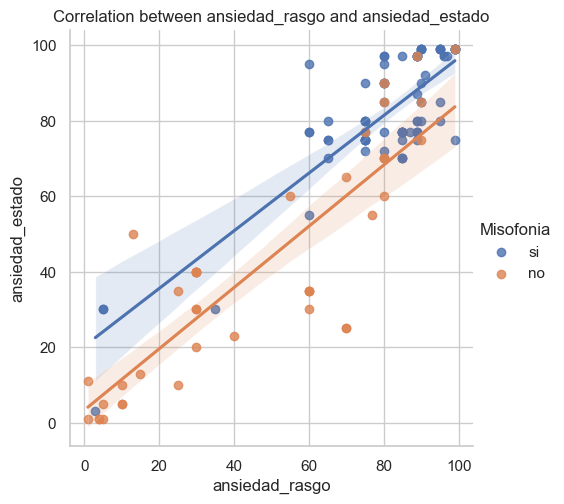

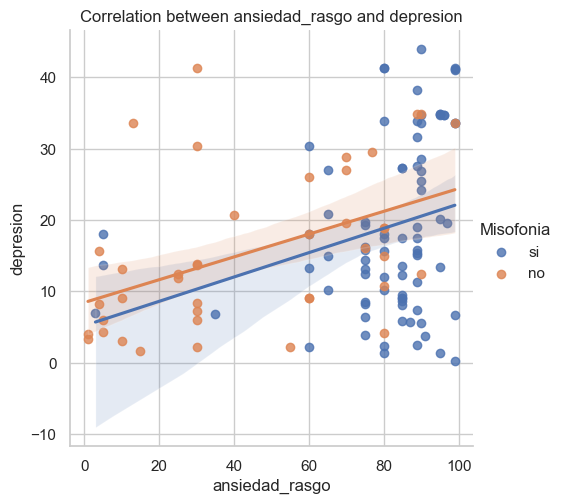

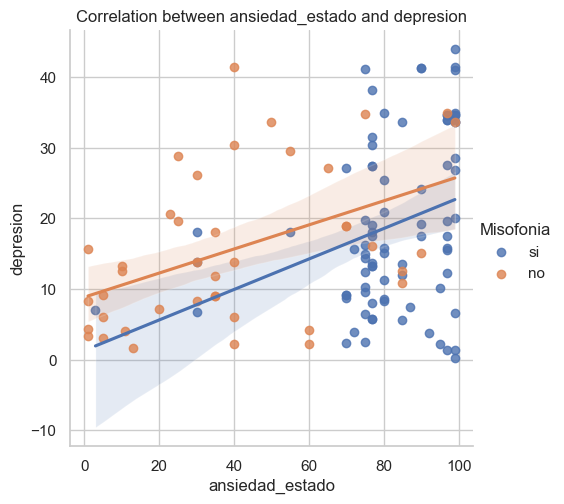

In [86]:
sns.lmplot(data=data, x="ansiedad_rasgo", y="ansiedad_estado", hue="Misofonia", height=5, aspect=1)
plt.title('Correlation between ansiedad_rasgo and ansiedad_estado')

sns.lmplot(data, x="ansiedad_rasgo", y="depresion", hue="Misofonia", height=5, aspect=1)
plt.title('Correlation between ansiedad_rasgo and depresion')

sns.lmplot(data, x="ansiedad_estado", y="depresion", hue="Misofonia", height=5, aspect=1)
plt.title('Correlation between ansiedad_estado and depresion')

# sns.lmplot(data, x="ansiedad_rasgo", y="ansiedad_medicada_dic", hue="Misofonia")
# plt.title('Correlation between ansiedad_rasgo and ansiedad_medicada_dic')

# sns.lmplot(data, x="ansiedad_estado", y="ansiedad_medicada_dic", hue="Misofonia")
# plt.title('Correlation between ansiedad_estado and ansiedad_medicada_dic')

# sns.lmplot(data, x="depresion", y="ansiedad_medicada_dic", hue="Misofonia")
# plt.title('Correlation between depresion and ansiedad_medicada_dic')

plt.show()

## Test the effect of Sex on Misophonia

We also wanted to test the effect of Sex on Misophonia. As we did earlier, we can do this with the statistical tests like ANOVA, Krustal-Wallis test or Logistic regression. Since we already these analyses, we wanted to test some simple machine learning classification approaches like Decision Trees or Random Forest which will basically give the same results. Here we choose to go with the Decision Tee. Although we have very limited dataset for training and evaluating the model, we analyze the results based on this specific data, which may not be able to generalize on other datasets.

For Random Forest we use `DecisionTreeClassifier` class of `sklearn`. We also need to split the dataset into train and test samples which is done by `train_test_split` method. We split 20% of the dataset into test samples. The train samples will be used for training the model in batches while the test samples will be used to evaluate the model. Moreover, our `Sexo` data is alphabetic, we need to encode these labels into numbers. For this, we use `LabelEncoder` class of `sklearn` which transforms these alphabetic characters into numerical values.

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

### Data Preprocessing
y_true = data_cleaned['Misofonia_encoded']
Encoding the labels, segregating input varibles `x` and target variables `y_true`, and splitting data. Here input variables are `Sexo` data and labels are `Misofonia` data. We be predicting Misophonia based on the sex data.

In [146]:
le = LabelEncoder()
data_cleaned.loc[:, 'Sexo_encoded'] = le.fit_transform(data_cleaned['Sexo'])
data_cleaned.loc[:,'Misofonia_encoded'] = le.fit_transform(data_cleaned['Misofonia'])

features = ['Sexo_encoded']
X = data_cleaned[features]
y = data_cleaned['Misofonia_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trainig the Decision Tree classifier, model fitting, and evaluating the model results. We use the most commonly used metrics: precision-recall and F1-score for evaluating the model. 

- **Precision** tells us how many of the predictions that were classified as a certain label (e.g., `Misofonia = 1`) are actually correct. It is given by,

    $precision = \frac{True Positives}{True Positives + False Positives}$

- **Recall** tells us how many of the actual instances of a label (e.g.,`Misofonia = 1`) the model was able to correctly identify. It is given by:

    $precision = \frac{True Positives}{True Positives + False Negatives}$

- **F1-Score** is the combination of Precision and Recall as their harmonic mean, balancing the trade-off between them. It is given by:

    $F1 Score = 2 * \frac{Precision \times Recall}{Precision + Recall}$


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.56      1.00      0.72        14

    accuracy                           0.56        25
   macro avg       0.28      0.50      0.36        25
weighted avg       0.31      0.56      0.40        25



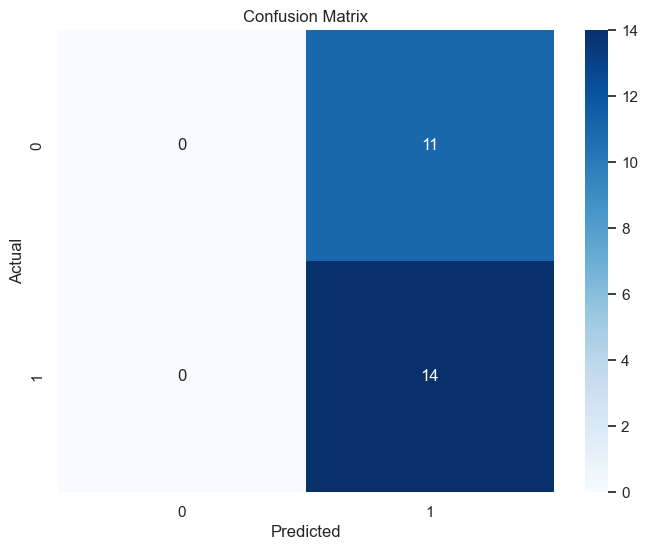

In [147]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classification_report = classification_report(y_test, y_pred, zero_division=0)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_report)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix above shows us that the Random Forest classifier predicted all cases as Misophonia (label `1`) and failed to predict any cases of non-Misophonia (label `0`). The accuracy remains at 56%, and the recall for the Misophonia class is 1.00, meaning all true positives were captured. However, no cases of non-Misophonia were identified, leading to 0 precision and recall for the non-Misophonia. This suggest that due to limited data samples, the model isn't the robust and for the given data and model, sex alone does not seem to be a sufficient predictor for identifying the presence or absence of Misophonia.

Moreover, the low accuracy, 56% of the model suggests that the model is struggling to lean the meaningful features resulting in underfitting. This is due to very low dataset. Although we are not able to robustly perfom this analysis, given sufficient dataset we can do a better generalization with Decision Trees.

## Cross-validation with statistical approach

We also cross validate the statistical significance of `Sexo` on `Misofonia` with Krustal-Wallis test. This also suggests no significant impact of Sex on Misophonia.

In [125]:
kruskal_test(data=data_cleaned, independent_var="Misofonia", columns=["Sexo"])

Kruskal-Wallis Test for Sexo:
  Statistic: 2.502564102564113
  P-value: 0.11366110793618557
  There is no significant difference between groups for Sexo.
